<a href="https://colab.research.google.com/github/yasirsid2004/Bank-Customer-Churn-Prediction/blob/main/customerchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries (if not already installed)
!pip install seaborn scikit-learn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()

# Replace filename with the uploaded file's name
data = pd.read_csv("Bank Customer Churn Prediction.csv")

# Preview dataset
print("Data Overview:")
print(data.head())


Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv
Data Overview:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [3]:
# Check column names
print("Dataset Columns:")
print(data.columns)

# Check missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop missing values (if any)
data = data.dropna()

# Define target column (change 'churn' to actual target name in your dataset, e.g., 'Exited')
target_col = 'churn'
X = data.drop(columns=[target_col])
y = data[target_col]

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Dataset Columns:
Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

Missing Values:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [4]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 8000
Test set size: 2000


In [5]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [6]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Model Evaluation:
Accuracy: 0.81
Confusion Matrix:
 [[1543   64]
 [ 315   78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



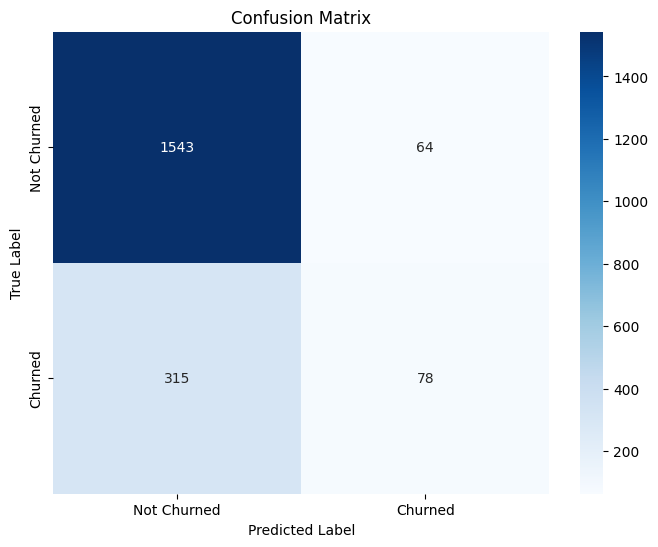

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


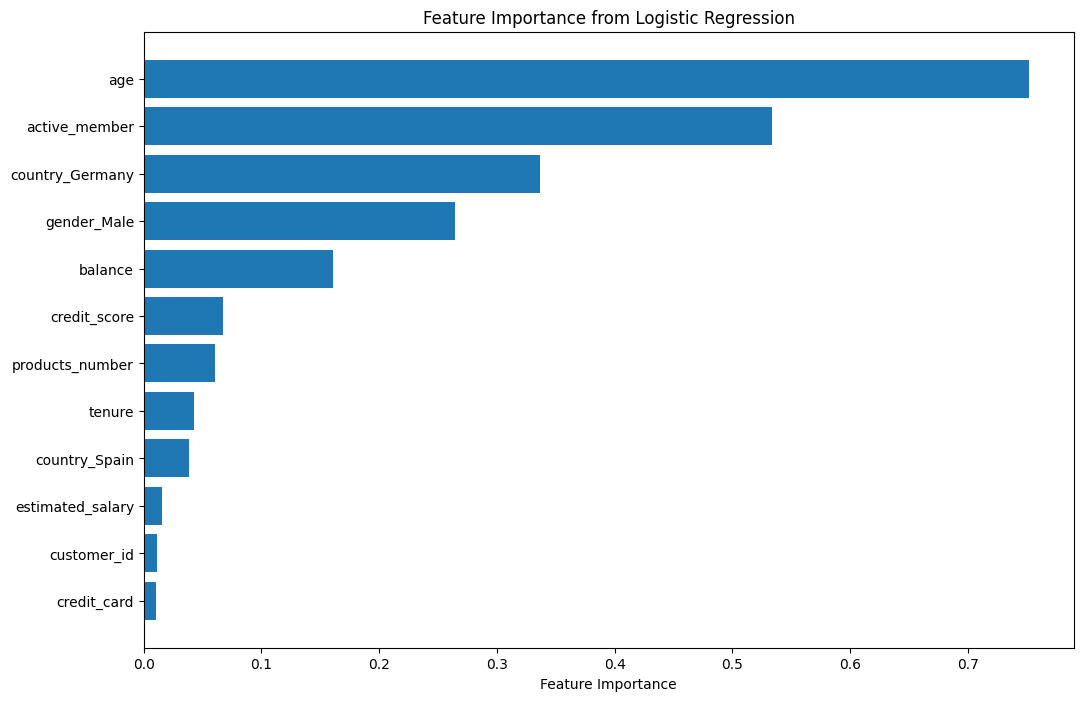

In [8]:
coefficients = model.coef_[0]
feature_names = X.columns
feature_importance = np.abs(coefficients)
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Logistic Regression")
plt.show()


/tmp/ipython-input-2993537552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=data, palette='Set2')


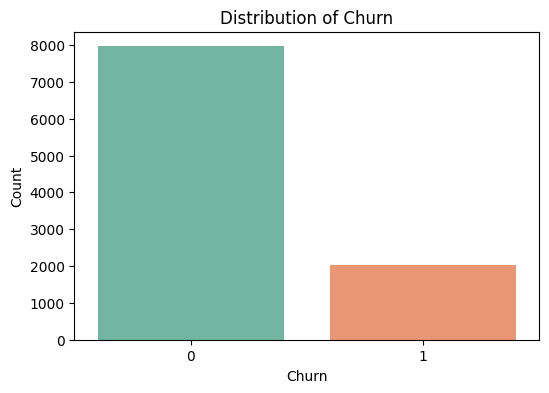

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=data, palette='Set2')
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


In [10]:
print("Conclusion:")
print("The Logistic Regression model was used for predicting customer churn.")
print(f"Final Accuracy: {accuracy:.2f}")


Conclusion:
The Logistic Regression model was used for predicting customer churn.
Final Accuracy: 0.81
